In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')

Using TensorFlow backend.


# Preprocessing

Let's load data from 6 different classes : cat, sheep, giraffe, bat, octopus and camel. Each drawing consists in 784 pixels, and each dataset has between 123 000 and 150 000 drawings.

In [2]:
# load the data
camel = np.load('data/camel.npy')
cat = np.load('data/cat.npy')
sheep = np.load('data/sheep.npy')
giraffe = np.load('data/giraffe.npy')
bat = np.load('data/bat.npy')
octopus = np.load('data/octopus.npy')
aircraft = np.load('data/full_numpy_bitmap_aircraft carrier.npy')
ice_cream = np.load('data/full_numpy_bitmap_ice cream.npy')
laptop = np.load('data/full_numpy_bitmap_laptop.npy')
mosquito = np.load('data/full_numpy_bitmap_mosquito.npy')
sheep = np.load('data/full_numpy_bitmap_sheep.npy')
spider = np.load('data/full_numpy_bitmap_spider.npy')
submarine = np.load('data/full_numpy_bitmap_submarine.npy')
guitar = np.load('data/full_numpy_bitmap_guitar.npy')
bed = np.load('data/full_numpy_bitmap_bed.npy')
angel = np.load('data/full_numpy_bitmap_angel.npy')
palm_tree = np.load('data/full_numpy_bitmap_palm tree.npy')
helicopter = np.load('data/full_numpy_bitmap_helicopter.npy')

print(cat.shape)
print(sheep.shape)
print(giraffe.shape)
print(bat.shape)
print(octopus.shape)
print(camel.shape)
print(bed.shape)
print(laptop.shape)
print(angel.shape)
print(spider.shape)
print(palm_tree.shape)
print(mosquito.shape)

(123202, 784)
(126121, 784)
(127182, 784)
(118114, 784)
(150152, 784)
(121399, 784)
(113862, 784)
(261501, 784)
(149736, 784)
(209447, 784)
(121959, 784)
(123029, 784)


For each class, we add a column to set the labels. { 0:'cat', 1:'giraffe', 2:'sheep', 3:'bat', 4:'octopus', 5:'camel'}



In [3]:
# Each class add one column for label 0, 1, 2, 3, 4, 5

cat = np.c_[cat, np.zeros(len(cat))]
giraffe = np.c_[giraffe, np.ones(len(giraffe))]
sheep = np.c_[sheep, 2*np.ones(len(sheep))]
bat = np.c_[bat, 3*np.ones(len(bat))]
octopus = np.c_[octopus, 4*np.ones(len(octopus))]
camel = np.c_[camel, 5*np.ones(len(camel))]
aircraft = np.c_[aircraft, 6*np.ones(len(aircraft))]
ice_cream = np.c_[ice_cream, 7*np.ones(len(ice_cream))]
laptop = np.c_[laptop, 8*np.ones(len(laptop))]
mosquito = np.c_[mosquito, 9*np.ones(len(mosquito))]
spider = np.c_[spider, 10*np.ones(len(spider))]
submarine = np.c_[submarine, 11*np.ones(len(submarine))]
guitar = np.c_[guitar, 12*np.ones(len(guitar))]
bed = np.c_[bed, 13*np.ones(len(bed))]
angel = np.c_[angel, 14*np.ones(len(angel))]
palm_tree = np.c_[palm_tree, 15*np.ones(len(palm_tree))]
helicopter = np.c_[helicopter, 16*np.ones(len(helicopter))]
print(cat.shape)

(123202, 785)


In [22]:
np.c_?

Type:        CClass
String form: <numpy.lib.index_tricks.CClass object at 0x7f2424550e50>
Length:      0
File:        /opt/conda/lib/python3.7/site-packages/numpy/lib/index_tricks.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])


In [4]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

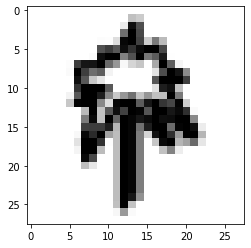

In [5]:
# reshape from 784 to 28:28

plt.imshow(palm_tree[0,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')

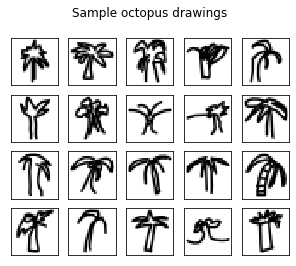

In [6]:
plot_samples(palm_tree, title='Sample octopus drawings\n')

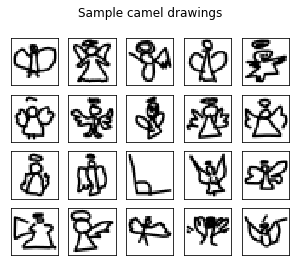

In [7]:
plot_samples(angel, title='Sample camel drawings\n')

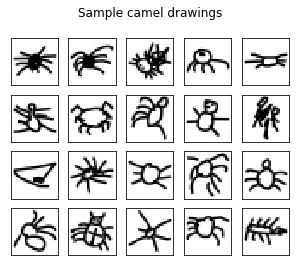

In [8]:
plot_samples(spider, title='Sample camel drawings\n')

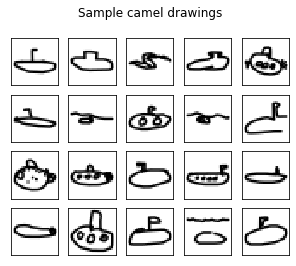

In [9]:
plot_samples(submarine, title='Sample camel drawings\n')


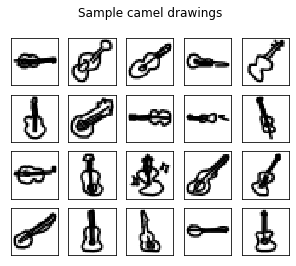

In [10]:
plot_samples(guitar, title='Sample camel drawings\n')

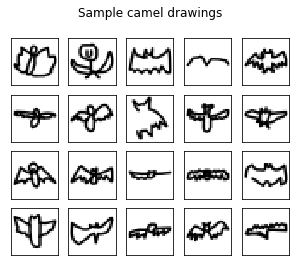

In [11]:
plot_samples(bat, title='Sample camel drawings\n')

Next step :

- We need to combine our data so we can use it for the train and test. I will only use 10 000 samples for this model.
- We then can split the features and labels (X and y).
- Finally, we split data between train and test following the usual (80 - 20) ratio. We also normalize values between 0 and 1 (X/255) as pixels values are initially gray scale between 0 and 255.

In [12]:
# Merging arrays and splitting the features and labels
X = np.concatenate((cat[:50000,:-1], giraffe[:50000,:-1], sheep[:50000,:-1], bat[:50000,:-1], octopus[:50000,:-1], camel[:50000, :-1], aircraft[:50000, :-1], ice_cream[:50000, :-1], laptop[:50000, :-1], mosquito[:50000, :-1], spider[:50000, :-1], submarine[:50000, :-1], guitar[:50000, :-1], bed[:50000, :-1], angel[:50000, :-1], palm_tree[:50000, :-1], helicopter[:50000, :-1],), axis=0).astype('float32') # all columns but the last
y = np.concatenate((cat[:50000,-1], giraffe[:50000,-1], sheep[:50000,-1], bat[:50000,-1], octopus[:50000,-1],  camel[:50000,-1], aircraft[:50000,-1], ice_cream[:50000,-1], laptop[:50000,-1], mosquito[:50000,-1], spider[:50000,-1], submarine[:50000,-1], guitar[:50000,-1], bed[:50000,-1], angel[:50000,-1], palm_tree[:50000,-1], helicopter[:50000,-1]), axis=0).astype('float32') # the last column

# We than split data between train and test (80 - 20 usual ratio). Normalizing the value between 0 and 1
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  stratify=np.array(y_train), 
                                                  random_state=42)

In [14]:
X_train.shape

(578000, 784)

Output variable is an integer from 0 to 5 (MultiClass Classification problem). We are gonna use a one hot encoding of the class values.

In [15]:
Y_train = np_utils.to_categorical(y_train)
Y_val = np_utils.to_categorical(y_val)
Y_test = np_utils.to_categorical(y_test)

In [16]:
# one hot encode outputs
# y_train_cnn = np_utils.to_categorical(y_train)
# y_test_cnn = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]
num_classes

17

In [17]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
# # reshape to be [samples][channels][width][height]
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32')

In [19]:
# X_train_cnn.shape

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = './model_cnn_50000.h5'

callbacks = [
    EarlyStopping(
        monitor='val_accuracy', 
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=0)
]

## CNN Model

We will now to build our CNN model using Keras. This model will have the following layers :

- Convolutional Layer : 30 filters, (3 * 3) kernel size
- Max Pooling Layer : (2 * 2) pool size
- Convolutional Layer : 15 filters, (3 * 3) kernel size
- Max Pooling Layer : (2 * 2) pool size
- DropOut Layer : Dropping 20% of neurons.
- Flatten Layer
- Dense/Fully Connected Layer : 128 Neurons, Relu activation function
- Dense/Fully Connected Layer : 50 Neurons, Softmax activation function
- Input shape : pixels width height : 1 28 28

We run our model for 15 epochs and with a batch size of 200.

In [181]:
# def cnn_model():
#     # create model
#     model = Sequential()
#     model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(BatchNormalization())

#     model.add(Dense(128, activation='relu'))
#     model.add(BatchNormalization())

#     model.add(Dense(num_classes, activation='softmax'))
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [29]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
X_train.shape

(578000, 28, 28, 1)

In [31]:
X_test.shape

(170000, 28, 28, 1)

In [32]:
X_val.shape

(102000, 28, 28, 1)

In [33]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32')

In [34]:
Y_val.shape

(102000, 17)

In [35]:
Y_val

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
%%time
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, batch_size=200, shuffle=True)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Final CNN accuracy: ', scores[1])

Train on 578000 samples, validate on 102000 samples
Epoch 1/20
578000/578000 [==============================] - 19s 33us/step - loss: 0.7899 - accuracy: 0.7636 - val_loss: 0.5263 - val_accuracy: 0.8456
Epoch 2/20
578000/578000 [==============================] - 15s 27us/step - loss: 0.5405 - accuracy: 0.8388 - val_loss: 0.4573 - val_accuracy: 0.8651
Epoch 3/20
578000/578000 [==============================] - 15s 26us/step - loss: 0.4851 - accuracy: 0.8553 - val_loss: 0.4298 - val_accuracy: 0.8735
Epoch 4/20
578000/578000 [==============================] - 15s 27us/step - loss: 0.4570 - accuracy: 0.8634 - val_loss: 0.4024 - val_accuracy: 0.8813
Epoch 5/20
578000/578000 [==============================] - 15s 26us/step - loss: 0.4384 - accuracy: 0.8687 - val_loss: 0.3945 - val_accuracy: 0.8826
Epoch 6/20
578000/578000 [==============================] - 15s 26us/step - loss: 0.4245 - accuracy: 0.8726 - val_loss: 0.3824 - val_accuracy: 0.8877
Epoch 7/20
578000/578000 [======================

# Confusion Matrix

In [37]:
Y_pred = model_cnn.predict_classes(X_test, verbose=0)

In [38]:
Y_pred

array([ 4, 16,  3, ..., 11,  3, 10])

In [39]:
test = tf.argmax(Y_test, axis = 1)
Y_test = test.numpy()

In [40]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(Y_test, Y_pred)

In [41]:
c_matrix

array([[9089,   72,  136,  135,   30,   62,  119,   13,   12,  266,   41,
          14,   19,   29,   50,   16,   47],
       [  30, 9484,   17,   23,   14,  114,   37,    9,   14,   55,    1,
          14,   38,   14,   15,   44,    8],
       [ 136,   29, 9221,   70,   20,  205,   90,    8,    8,   86,   21,
          12,   14,   24,   43,   21,   14],
       [ 147,   45,   71, 8263,   66,  214,  251,   30,   20,  303,   20,
          51,   56,   21,  332,   53,   26],
       [  15,   12,   33,   53, 9032,   51,   47,    6,   10,  284,  181,
          17,    2,    2,   69,   31,   15],
       [  43,  175,  163,   94,   27, 9215,   53,    2,    5,   95,    7,
          10,    5,   18,   14,   19,    9],
       [ 115,   31,   71,  280,   40,   53, 7672,   27,  161,  453,   29,
         384,   69,  234,   85,   38,  290],
       [  10,    9,   18,   25,    3,    5,   48, 9817,   15,   50,    4,
           3,    9,   13,   43,   26,   10],
       [  14,   19,    9,   17,    5,    3,  111

In [42]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

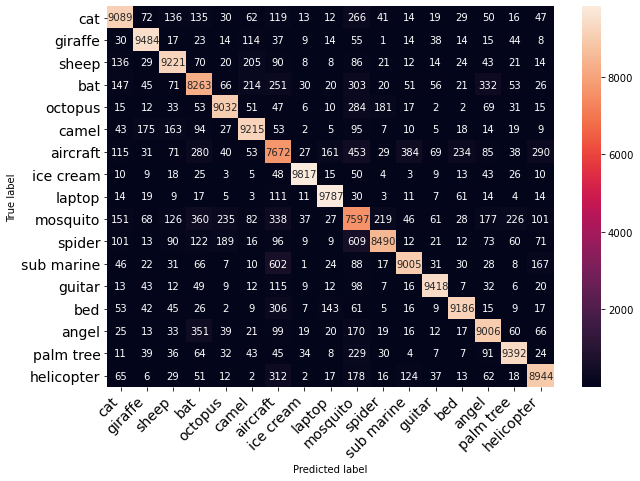

In [43]:
class_names = ['cat', 'giraffe', 'sheep', 'bat', 'octopus', 'camel', 'aircraft', 'ice cream', 'laptop', 'mosquito', 'spider', 'sub marine', 'guitar', 'bed', 'angel', 'palm tree', 'helicopter']
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [44]:
#Misclassification when y_pred and y_test are different.
misclassified = X_test[Y_pred != Y_test]

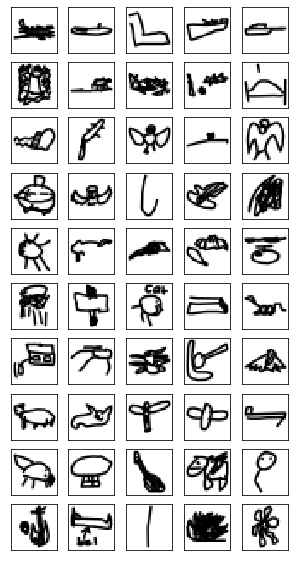

In [45]:
plot_samples(misclassified, rows=10, cols=5, title='')

In [46]:
import pickle
with open('model_cnn.pkl', 'wb') as file:
      pickle.dump(model_cnn, file)

In [49]:
Y_test = np_utils.to_categorical(y_test)

In [50]:
scores = model_cnn.evaluate(X_test, Y_test, verbose=0)

In [51]:
scores

[0.34646189419066203, 0.8977529406547546]

In [71]:
test = X_test[0].reshape(1, 28, 28, 1)

In [72]:
prediction = model_cnn.predict(test)

In [73]:
index = np.argmax(prediction[0])
label_dict = {0:'Cat', 1:'Giraffe', 2:'Sheep', 3:'Bat', 4:'Octopus', 5:'Camel', 6:'aircraft', 7:'ice cream', 8:'laptop', 9:'mosquito', 10:'spider', 11:'sub marine', 12:'guitar', 13:'bed', 14:'angel', 15:'palm tree', 16:'helicopter'}
final_pred = label_dict[index]

In [74]:
final_pred

'Octopus'

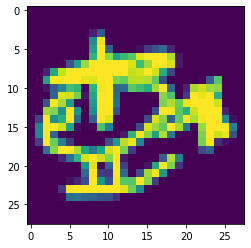

In [78]:
plt.imshow(X_test[1].squeeze())

In [77]:
model_cnn.save('model_cnn_more.h5')

In [62]:
model = tf.keras.models.load_model('model_cnn.h5')

In [63]:
model.predict(test)

array([[0.02513259, 0.0020526 , 0.00138233, 0.01762946, 0.02641638,
        0.01836544, 0.67880815, 0.00187568, 0.0097814 , 0.04038902,
        0.00509695, 0.02699851, 0.10493752, 0.0046301 , 0.00217249,
        0.00252654, 0.03180486]], dtype=float32)